In [1]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
create_experiment_snapshots([25, 50, 75, 100])

In [3]:
evaluation = execute_simulation(start_time=0, mtd_interval=200, scheme='single',custom_strategies=IPShuffle, total_nodes=100)

Adversary: Start SCAN_HOST at 0.0s.
MTD: IPShuffle triggered 0.0s
MTD: IPShuffle deployed in the network at 0.0s.
Adversary: Processed SCAN_HOST at 5.0s.
Adversary: Start ENUM_HOST at 5.0s.
Adversary: Processed ENUM_HOST at 10.0s.
Adversary: Start SCAN_PORT at 10.0s.
Adversary: Processed SCAN_PORT at 35.0s.
Adversary: Start EXPLOIT_VULN baa3b8e8-3d7a-439b-ae33-1e1a99b4868b at 35.0s.
Adversary: Processed EXPLOIT_VULN baa3b8e8-3d7a-439b-ae33-1e1a99b4868b at 37.1s.
Adversary: Start EXPLOIT_VULN 5dfc6e6b-fada-487a-b51d-c7b7d7490b3e at 37.1s.
Adversary: Processed EXPLOIT_VULN 5dfc6e6b-fada-487a-b51d-c7b7d7490b3e at 39.8s.
Adversary: Start EXPLOIT_VULN 2a00cfa0-d19c-4dac-8ee6-735b1c58baf3 at 39.8s.
Adversary: Processed EXPLOIT_VULN 2a00cfa0-d19c-4dac-8ee6-735b1c58baf3 at 47.7s.
Adversary: Start EXPLOIT_VULN 00b4e58f-9c0e-4125-a775-6b75e6f11f24 at 47.7s.
Adversary: Processed EXPLOIT_VULN 00b4e58f-9c0e-4125-a775-6b75e6f11f24 at 53.9s.
Adversary: Start EXPLOIT_VULN caa37f56-907e-4372-89da-c3faf

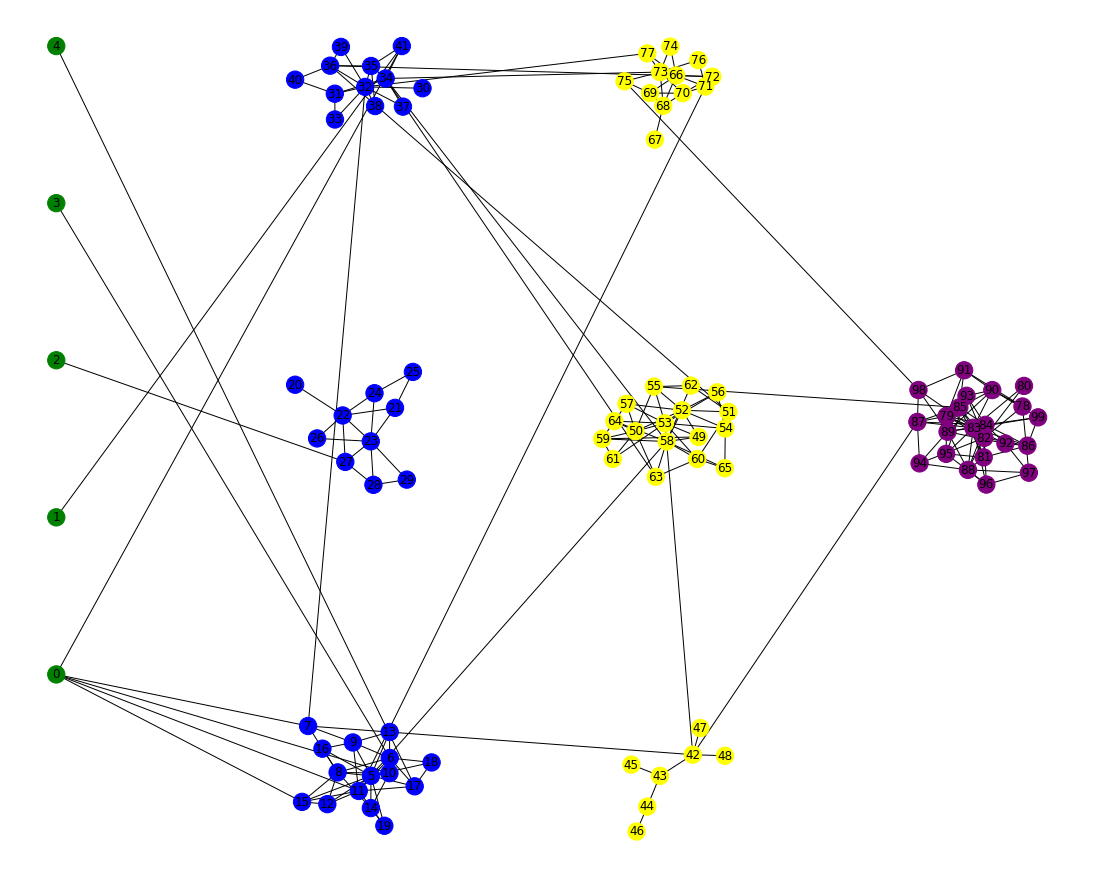

In [4]:
evaluation.get_network().draw()
plt.show()

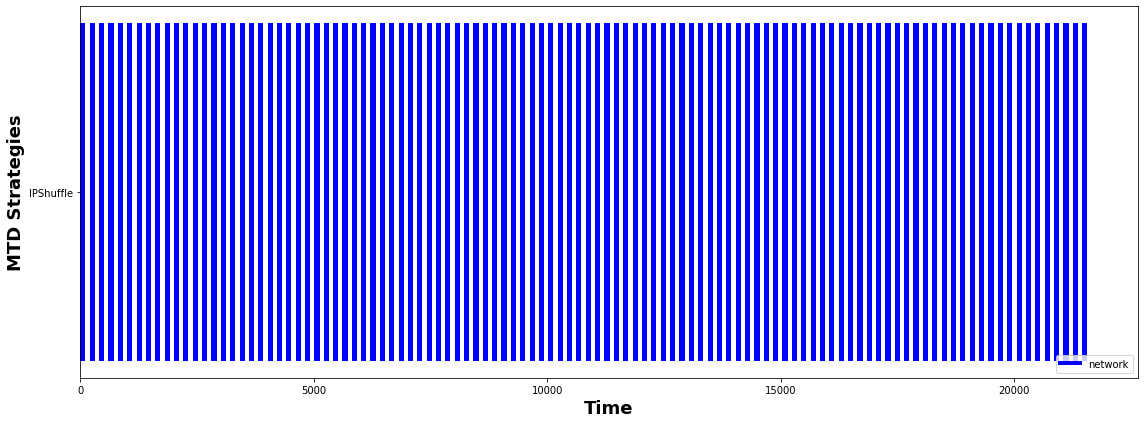

In [5]:
evaluation.visualise_mtd_operation()

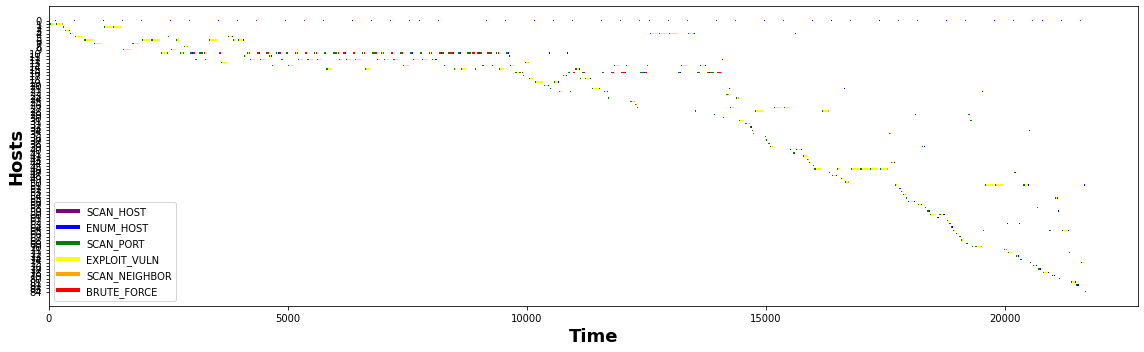

In [6]:
evaluation.visualise_attack_operation_group_by_host()

total compromised hosts:  81


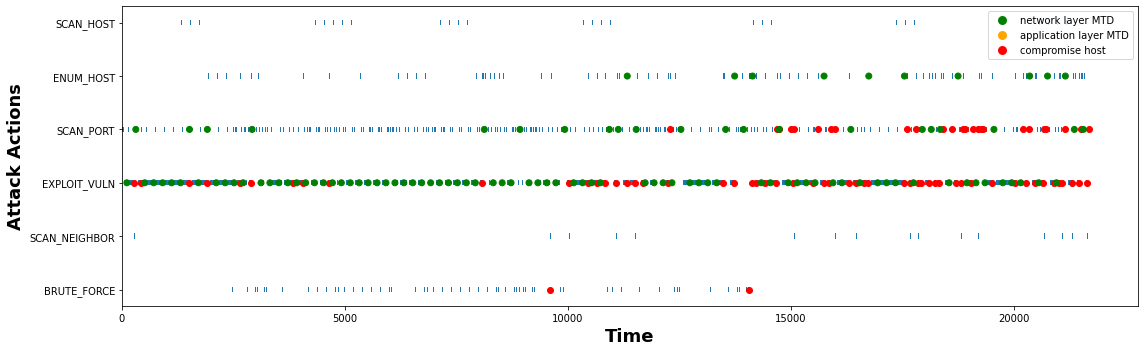

In [7]:
evaluation.visualise_attack_operation()

In [8]:
evaluation.compromise_record_by_attack_action()

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
24,EXPLOIT_VULN,265.029261,280.302954,15.273693,0,7e48a305-ae41-4789-84b3-d609b53b6fd1,0,7e48a305-ae41-4789-84b3-d609b53b6fd1,2,17,0,"[Kandace, Dulciana, Kyle, Ferne, Carline]",None,None,yellow,1
38,EXPLOIT_VULN,415.001287,421.624618,6.623331,41,b543b0c3-6fc2-4548-87eb-9e57c86a2948,41,b543b0c3-6fc2-4548-87eb-9e57c86a2948,1,25,1,"[Giana, Wanids, Carilyn, Nisse, Margaret]",None,None,yellow,3
163,EXPLOIT_VULN,1486.342962,1503.991027,17.648065,11,fc3b95ed-3add-4c62-819b-e4d8816c7f67,11,fc3b95ed-3add-4c62-819b-e4d8816c7f67,3,127,2,"[Roseanne, Jaquenette, Bamby]",None,None,yellow,2
202,EXPLOIT_VULN,1887.847325,1899.903626,12.056301,15,d7729b54-9959-442a-b553-c924ae985289,15,d7729b54-9959-442a-b553-c924ae985289,2,156,3,"[Nonnah, Catherin, Ruthe]",None,None,yellow,7
270,EXPLOIT_VULN,2637.673869,2651.778601,14.104733,17,9e3c65d3-e329-4ccb-b680-a71e0c1da983,17,9e3c65d3-e329-4ccb-b680-a71e0c1da983,2,202,4,"[Prisca, Pennie, Antoinette]",None,None,yellow,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,EXPLOIT_VULN,21309.546115,21315.888257,6.342142,55,c5ab70ca-5eab-4d91-bc90-14486f9cce10,55,c5ab70ca-5eab-4d91-bc90-14486f9cce10,4,959,76,[],None,None,yellow,65
1917,EXPLOIT_VULN,21448.935481,21460.768109,11.832628,92,6a3ae001-821a-460f-943e-0fb48ae1a385,92,6a3ae001-821a-460f-943e-0fb48ae1a385,1,962,77,[],None,None,yellow,81
1924,SCAN_PORT,21490.768109,21515.768109,25.000000,93,437f32f7-f47b-42f3-a7cd-0976b2abaca8,93,437f32f7-f47b-42f3-a7cd-0976b2abaca8,1,963,78,[],None,None,green,82
1938,EXPLOIT_VULN,21638.838093,21655.160138,16.322045,67,18135295-4674-45bb-806b-e5f3609220c1,67,18135295-4674-45bb-806b-e5f3609220c1,2,965,79,[],None,None,yellow,75


In [9]:
evaluation.compromise_record_by_attack_action('SCAN_PORT')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
1078,SCAN_PORT,12264.561874,12289.561874,25.0,36,3df5a709-5ea4-44e7-86ca-6853396fe87b,36,3df5a709-5ea4-44e7-86ca-6853396fe87b,1,595,20,[Gretna],None,None,green,26
1270,SCAN_PORT,14668.601107,14693.601107,25.0,73,2a06bfcc-77ba-468d-bd74-b4cc1e7dd50c,73,2a06bfcc-77ba-468d-bd74-b4cc1e7dd50c,1,676,28,[],None,None,green,33
1273,SCAN_PORT,14703.601107,14728.601107,25.0,70,d046627f-7ec9-4f3d-90b4-1dbdbcdcbb98,70,d046627f-7ec9-4f3d-90b4-1dbdbcdcbb98,1,676,29,[Kattie],None,None,green,34
1297,SCAN_PORT,14974.697402,14999.697402,25.0,87,cb669dcc-b418-4a8f-b7b5-4c0794c536dd,87,cb669dcc-b418-4a8f-b7b5-4c0794c536dd,1,690,30,[Oliy],None,None,green,36
1304,SCAN_PORT,15054.946747,15079.946747,25.0,91,a28dc9a2-5403-4f01-863a-32e28e376a7d,91,a28dc9a2-5403-4f01-863a-32e28e376a7d,1,691,32,"[Alleen, Steffane]",None,None,green,38
1349,SCAN_PORT,15575.896546,15600.896546,25.0,37,383e30f1-f21a-459d-a322-cfc166a17b6a,37,383e30f1-f21a-459d-a322-cfc166a17b6a,1,718,34,[],None,None,green,41
1375,SCAN_PORT,15868.167997,15893.167997,25.0,66,92ce699b-c76e-4d14-8245-5ddb83cac01d,66,92ce699b-c76e-4d14-8245-5ddb83cac01d,1,728,37,[Diahann],None,None,green,43
1383,SCAN_PORT,15978.290815,16003.290815,25.0,48,21a13f1d-349d-4945-8e11-83210e315c5e,48,21a13f1d-349d-4945-8e11-83210e315c5e,1,729,38,[Ezmeralda],None,None,green,45
1535,SCAN_PORT,17581.098545,17606.098545,25.0,69,1e245e5b-9325-4b03-9077-72bbf08a5672,69,1e245e5b-9325-4b03-9077-72bbf08a5672,2,827,44,[],None,None,green,35
1556,SCAN_PORT,17783.693381,17808.693381,25.0,85,ce620d28-2e8b-479a-9d8f-cf542ccd8e5e,85,ce620d28-2e8b-479a-9d8f-cf542ccd8e5e,1,834,46,[Elladine],None,None,green,52


In [10]:
evaluation.compromise_record_by_attack_action('EXPLOIT_VULN')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
24,EXPLOIT_VULN,265.029261,280.302954,15.273693,0,7e48a305-ae41-4789-84b3-d609b53b6fd1,0,7e48a305-ae41-4789-84b3-d609b53b6fd1,2,17,0,"[Kandace, Dulciana, Kyle, Ferne, Carline]",None,None,yellow,1
38,EXPLOIT_VULN,415.001287,421.624618,6.623331,41,b543b0c3-6fc2-4548-87eb-9e57c86a2948,41,b543b0c3-6fc2-4548-87eb-9e57c86a2948,1,25,1,"[Giana, Wanids, Carilyn, Nisse, Margaret]",None,None,yellow,3
163,EXPLOIT_VULN,1486.342962,1503.991027,17.648065,11,fc3b95ed-3add-4c62-819b-e4d8816c7f67,11,fc3b95ed-3add-4c62-819b-e4d8816c7f67,3,127,2,"[Roseanne, Jaquenette, Bamby]",None,None,yellow,2
202,EXPLOIT_VULN,1887.847325,1899.903626,12.056301,15,d7729b54-9959-442a-b553-c924ae985289,15,d7729b54-9959-442a-b553-c924ae985289,2,156,3,"[Nonnah, Catherin, Ruthe]",None,None,yellow,7
270,EXPLOIT_VULN,2637.673869,2651.778601,14.104733,17,9e3c65d3-e329-4ccb-b680-a71e0c1da983,17,9e3c65d3-e329-4ccb-b680-a71e0c1da983,2,202,4,"[Prisca, Pennie, Antoinette]",None,None,yellow,9
292,EXPLOIT_VULN,2892.336559,2898.309386,5.972827,12,0cdabf1b-a4fc-49f1-855f-ec8249d21c79,12,0cdabf1b-a4fc-49f1-855f-ec8249d21c79,2,214,5,"[Jandy, Diana, Dallas]",None,None,yellow,8
374,EXPLOIT_VULN,3817.437851,3833.837032,16.399180,10,81c8186b-d631-492b-954a-39a4aed58e78,10,81c8186b-d631-492b-954a-39a4aed58e78,3,258,6,"[Eileen, Helena, Nixie, Candide]",None,None,yellow,5
394,EXPLOIT_VULN,4058.062475,4065.594446,7.531971,7,9186ecdf-bbe9-43ab-9ca0-25d2b2e3f3ed,7,9186ecdf-bbe9-43ab-9ca0-25d2b2e3f3ed,7,271,7,"[Bernadine, Leone, Prudi, Yvette, Midge]",None,None,yellow,6
450,EXPLOIT_VULN,4631.899541,4642.041918,10.142377,8,49872107-93a6-4e52-a536-f24555ca48db,8,49872107-93a6-4e52-a536-f24555ca48db,3,303,8,"[Aaren, Samaria, Ivette, Lola]",None,None,yellow,11
724,EXPLOIT_VULN,8058.095017,8075.240895,17.145878,5,d1d9179f-ecf9-4bdf-9fc6-6bd397d4def4,5,d1d9179f-ecf9-4bdf-9fc6-6bd397d4def4,17,443,9,"[Kelsey, Roxane, Vicky, Annamaria]",None,None,yellow,12


In [11]:
evaluation.compromise_record_by_attack_action('BRUTE_FORCE')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
841,BRUTE_FORCE,9590.922674,9610.922674,20.0,6,e0bf6668-2bcf-41de-89af-b2b649fae4a8,6,e0bf6668-2bcf-41de-89af-b2b649fae4a8,46,482,10,"[Jacquelyn, Johnath]",None,None,red,10
1212,BRUTE_FORCE,14048.467048,14068.467048,20.0,13,53e46ed9-26ff-4a9e-baa3-09ba3e4eb419,13,53e46ed9-26ff-4a9e-baa3-09ba3e4eb419,19,651,23,[],None,None,red,16


In [12]:
evaluation.evaluation_result_by_compromise_checkpoint()

[{'time_to_compromise': 7759.394437823775,
  'attack_success_rate': 0.09803921568627451,
  'host_compromise_ratio': 0.1,
  'mtd_execution_frequency': 0.005008833248311457},
 {'time_to_compromise': 9796.302333597765,
  'attack_success_rate': 0.15037593984962405,
  'host_compromise_ratio': 0.2,
  'mtd_execution_frequency': 0.005008833248311457},
 {'time_to_compromise': 11847.678241140016,
  'attack_success_rate': 0.18292682926829268,
  'host_compromise_ratio': 0.3,
  'mtd_execution_frequency': 0.005008833248311457},
 {'time_to_compromise': 12966.177780967442,
  'attack_success_rate': 0.2222222222222222,
  'host_compromise_ratio': 0.4,
  'mtd_execution_frequency': 0.005008833248311457},
 {'time_to_compromise': 14293.07851687002,
  'attack_success_rate': 0.25380710659898476,
  'host_compromise_ratio': 0.5,
  'mtd_execution_frequency': 0.005008833248311457},
 {'time_to_compromise': 14913.98957861108,
  'attack_success_rate': 0.2843601895734597,
  'host_compromise_ratio': 0.6,
  'mtd_executi